In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhanupratapbiswas/iris-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 0.99k/0.99k [00:00<00:00, 1.18MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bhanupratapbiswas/iris-classification-dataset/versions/1


In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
import os

# The path variable from the previous cell holds the path to the downloaded dataset
# You can use os.listdir to see the files in the directory
# print(os.listdir(path))

# Assuming the dataset file is named 'IRIS.csv'
csv_file_path = os.path.join(path, 'IRIS.csv')

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:


# Step 2: Define the file path
file_path = "/root/.cache/kagglehub/datasets/bhanupratapbiswas/iris-classification-dataset/versions/1/iris.csv"

In [ ]:
# Step 3: Load the CSV dataset
df = pd.read_csv(csv_file_path)

In [ ]:
# Step 4: Initial data inspection
print("\n🔍 First 5 rows of the dataset:")
print(df.head())

print("\n📊 Dataset Info:")
print(df.info())

print("\n🔢 Class Distribution:")
print(df['species'].value_counts())


🔍 First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

🔢 Class Distribution:
species
Iris-setosa        50
Iris-versicolor    50


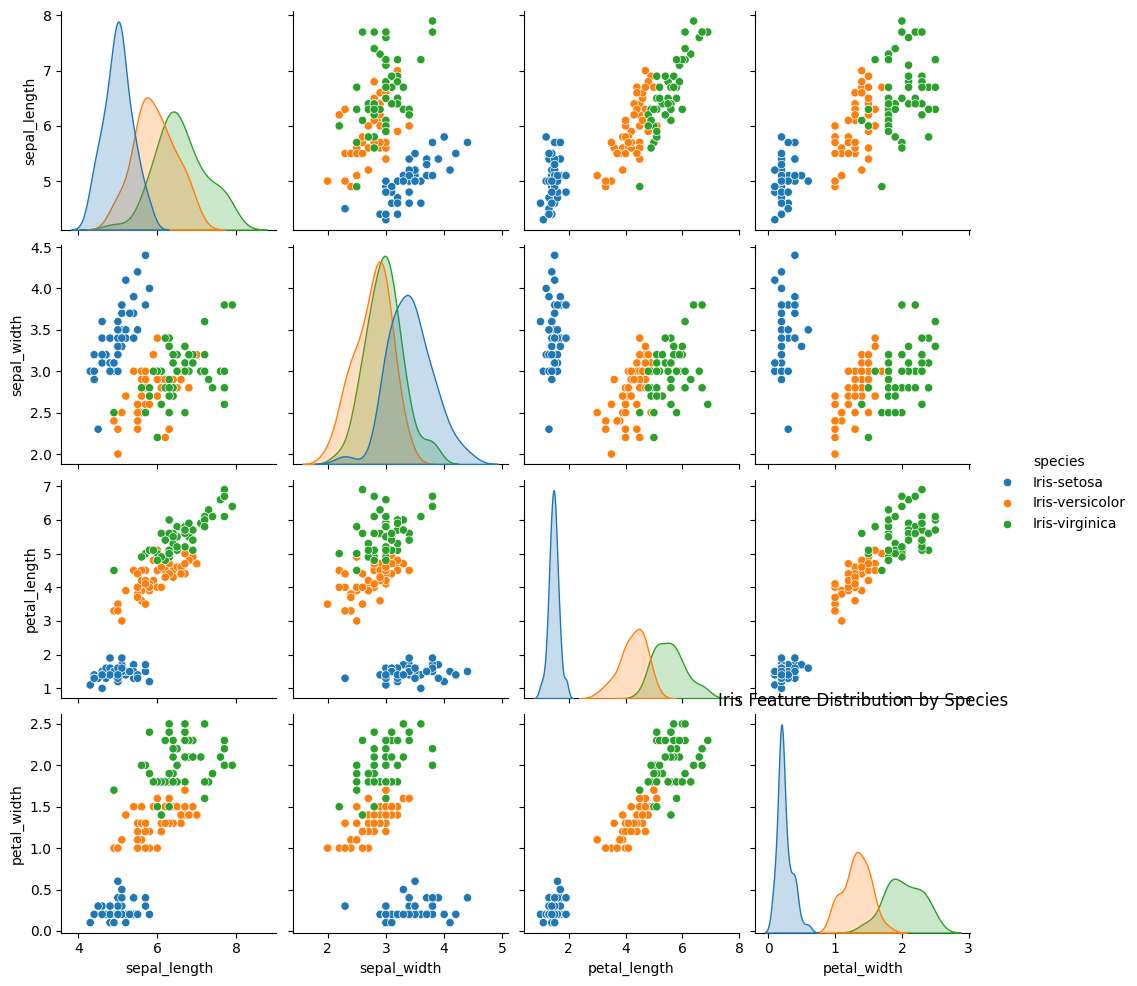

In [ ]:
# Step 5: Visualize feature distribution by species
sns.pairplot(df, hue='species')
plt.title("Iris Feature Distribution by Species")
plt.show()

In [ ]:
# Step 6: Encode the target labels
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# Step 7: Split dataset into features and labels
X = df.drop(columns=['species', 'species_encoded'])
y = df['species_encoded']

# Step 8: Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# 📌 Model 1: Decision Tree Classifier
# ======================================
print("\n🌳 Training Decision Tree Classifier...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("✅ Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("📉 Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))
print("📄 Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt, target_names=le.classes_))

# ======================================
# 📌 Model 2: Logistic Regression
# ======================================
print("\n🤖 Training Logistic Regression Model...")
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("✅ Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("📉 Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_lr))
print("📄 Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))

# Step 9: Predict a sample input (optional)
sample = [[5.1, 3.5, 1.4, 0.2]]  # Sample sepal/petal data
predicted_class = le.inverse_transform(dt_model.predict(sample))
print("\n🔮 Predicted class for sample input [5.1, 3.5, 1.4, 0.2]:", predicted_class[0])


🌳 Training Decision Tree Classifier...
✅ Decision Tree Accuracy: 1.0
📉 Confusion Matrix (Decision Tree):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
📄 Classification Report (Decision Tree):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


🤖 Training Logistic Regression Model...
✅ Logistic Regression Accuracy: 1.0
📉 Confusion Matrix (Logistic Regression):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
📄 Classification Report (Logistic Regression):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Check for missing values
print("\n🧹 Checking for missing values:")
print(df.isnull().sum())

# Describe statistics
print("\n📈 Statistical summary:")
print(df.describe())



🧹 Checking for missing values:
sepal_length       0
sepal_width        0
petal_length       0
petal_width        0
species            0
species_encoded    0
dtype: int64

📈 Statistical summary:
       sepal_length  sepal_width  petal_length  petal_width  species_encoded
count    150.000000   150.000000    150.000000   150.000000       150.000000
mean       5.843333     3.054000      3.758667     1.198667         1.000000
std        0.828066     0.433594      1.764420     0.763161         0.819232
min        4.300000     2.000000      1.000000     0.100000         0.000000
25%        5.100000     2.800000      1.600000     0.300000         0.000000
50%        5.800000     3.000000      4.350000     1.300000         1.000000
75%        6.400000     3.300000      5.100000     1.800000         2.000000
max        7.900000     4.400000      6.900000     2.500000         2.000000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


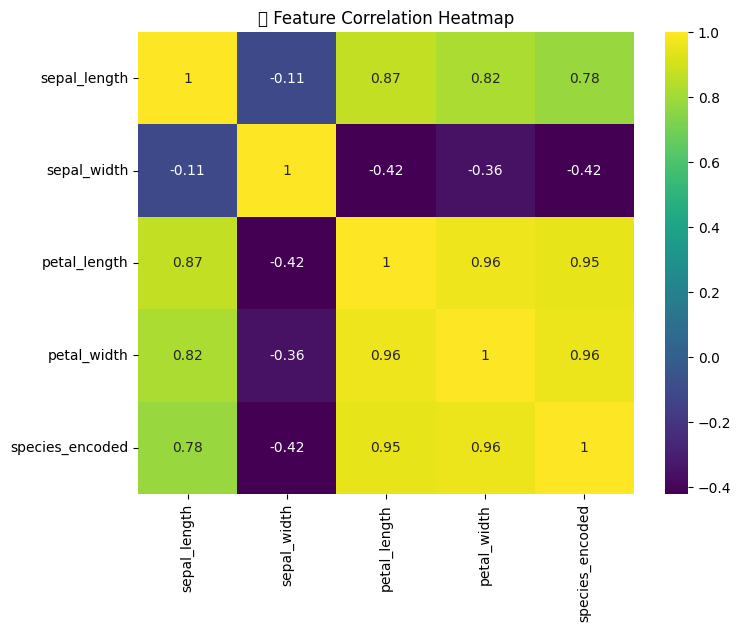

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns='species').corr(), annot=True, cmap='viridis')
plt.title("🔗 Feature Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM (Linear)": SVC(kernel='linear')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results[name] = acc
    print(f"\n📌 {name} Accuracy: {acc:.2f}")
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred, target_names=le.classes_))



📌 Decision Tree Accuracy: 1.00
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


📌 Logistic Regression Accuracy: 1.00
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


📌 K-Nearest Neighbors Accuracy: 1.00
[[10  0  0]
 [

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


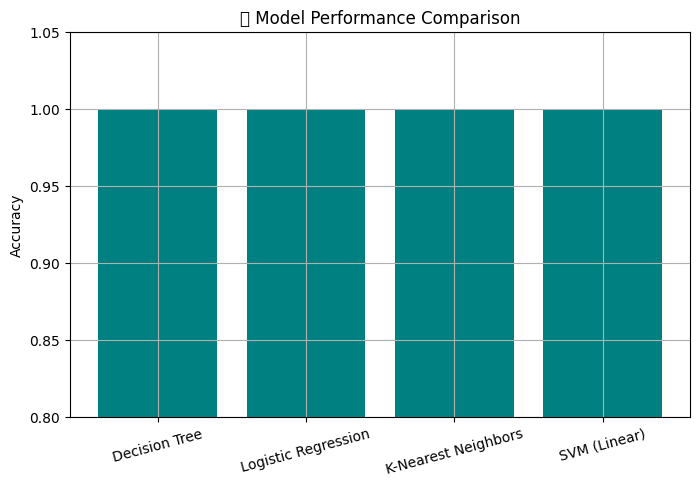

In [ ]:
# Bar chart of model accuracies
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='teal')
plt.ylabel("Accuracy")
plt.title("📊 Model Performance Comparison")
plt.xticks(rotation=15)
plt.ylim(0.8, 1.05)
plt.grid(True)
plt.show()


In [ ]:
import joblib

# Save Decision Tree and Logistic Regression
joblib.dump(dt_model, "decision_tree_model.pkl")
joblib.dump(lr_model, "logistic_regression_model.pkl")
joblib.dump(le, "label_encoder.pkl")
print("\n✅ Models and encoder saved successfully.")



✅ Models and encoder saved successfully.


In [ ]:
# Take input from user
print("\n🔎 Enter values to predict Iris species:")
try:
    sl = float(input("Sepal Length: "))
    sw = float(input("Sepal Width: "))
    pl = float(input("Petal Length: "))
    pw = float(input("Petal Width: "))

    user_input = [[sl, sw, pl, pw]]
    pred_class = le.inverse_transform(dt_model.predict(user_input))
    print(f"\n🌼 The predicted Iris species is: {pred_class[0]}")

except:
    print("⚠️ Invalid input. Please enter numeric values.")



🔎 Enter values to predict Iris species:
Sepal Length: 23
Sepal Width: 45
Petal Length: 35
Petal Width: 20

🌼 The predicted Iris species is: Iris-virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
